In [18]:
from utils.functions import best_scoring, output_images

AMOUNT = 20

# Generate and display images based on the best scoring results from a dataset.
df_sorted = best_scoring(filename="output_parquets/bb_attack_sdv1_30k_full_analyzed",amount=400, drop=False, sort_by="edge_scores", ascending=True)
df_sorted.drop(columns=["template_indices"], inplace=True)
df_sorted

# Iterate through the first 5 entries in the sorted DataFrame and output images
for i in range(AMOUNT):
    output_images(df_sorted, i, best=True, output="single")


# Generate and display images based on the best scoring results from a dataset.
df_sorted = best_scoring(filename="output_parquets/bb_attack_sdv1_multiple_full_analyzed",amount=400, drop=False, sort_by="edge_scores", ascending=True)
df_sorted.drop(columns=["template_indices"], inplace=True)
df_sorted

# # Iterate through the first 5 entries in the sorted DataFrame and output images
for i in range(AMOUNT):
    output_images(df_sorted, i, best=True, output="multiple", attackfolder="sdv3_bb_synthall")


Saved combined image to output_combined_images/single/combined_0.jpg
Saved combined image to output_combined_images/single/combined_1.jpg
Fehler beim Herunterladen der URL https://onlinecoach1.hipcast.com/albumart/1000_1618923228.jpg: 441 Client Error: status code 441 for url: https://onlinecoach1.hipcast.com/albumart/1000_1618923228.jpg
Saved combined image to output_combined_images/single/combined_2.jpg
Saved combined image to output_combined_images/single/combined_3.jpg
Saved combined image to output_combined_images/single/combined_4.jpg
Saved combined image to output_combined_images/single/combined_5.jpg
Saved combined image to output_combined_images/single/combined_6.jpg
Fehler beim Herunterladen der URL https://bridgepoint.hipcast.com/albumart/1255_1611128821.jpg: 441 Client Error: status code 441 for url: https://bridgepoint.hipcast.com/albumart/1255_1611128821.jpg
Saved combined image to output_combined_images/single/combined_7.jpg
Saved combined image to output_combined_images

FileNotFoundError: [Errno 2] No such file or directory: 'output_parquets/bb_attack_sdv1_multiple_full_analyzed.parquet'

In [1]:
from utils.functions import best_scoring, output_images

df = best_scoring(filename="output_parquets/bb_attack_sdv1_30k_full_analyzed",amount=5000, drop=False, sort_by="edge_scores", ascending=False)
df

,caption,index,scores,url,numdups,edge_scores,mse_real_gen,overfit_type,gen_seeds,retrieved_urls,template_indices
18443,Pick Blank Two Week Schedule Template (With Im...,1362509871,3637887.00,https://www.calendarhuzz.net/wp-content/upload...,9,-0.325012,59945.718750,N,[],[],[]
6509,Black and white shot of person walking on deso...,211851841,3658741.25,https://images.unsplash.com/8/nepal.jpg?ixlib=...,13,-0.325287,25460.744141,N,[],[],[]
3564,65-inch x 80-inch x 4 9/16-inch Brass 3/4-Lite...,1543139499,3637762.00,https://s7d2.scene7.com/is/image/homedepotcana...,8,-0.325577,17608.736328,N,[],[],[]
22136,Susan Blue Area Rug by Charlton Home,1986924042,3631136.50,https://secure.img1-ag.wfcdn.com/im/63753371/r...,74,-0.325867,21153.128906,N,[],[],[]
4444,"Aero 53984710WGRN 53 Series 15x8 Wheel, BL, 5 ...",1031246620,3653029.75,http://static.speedwaymotors.com/RS/SR/Product...,27,-0.325882,26905.767578,N,[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...
406,"""3M™ Privacy Filter for 24"""" Widescreen Monito...",1953226014,3632179.75,https://cdn.shopify.com/s/files/1/0250/9953/44...,6,-0.868073,31000.548828,N,[],[],[]
27018,"lock, locked, padlock, protected, protection, ...",1155508791,3643078.50,https://cdn3.iconfinder.com/data/icons/police-...,6,-0.914291,49388.468750,N,[],[],[]
22716,The No Limits Business Woman Podcast,1030727993,3970528.00,https://onlinecoach1.hipcast.com/albumart/1000...,811,-0.916794,76662.257812,N,[],[],[]
25877,"communication, email, mail, message, online, o...",2137580772,3646829.00,https://cdn2.iconfinder.com/data/icons/e-mail-...,8,-0.916794,50056.804688,N,[],[],[]


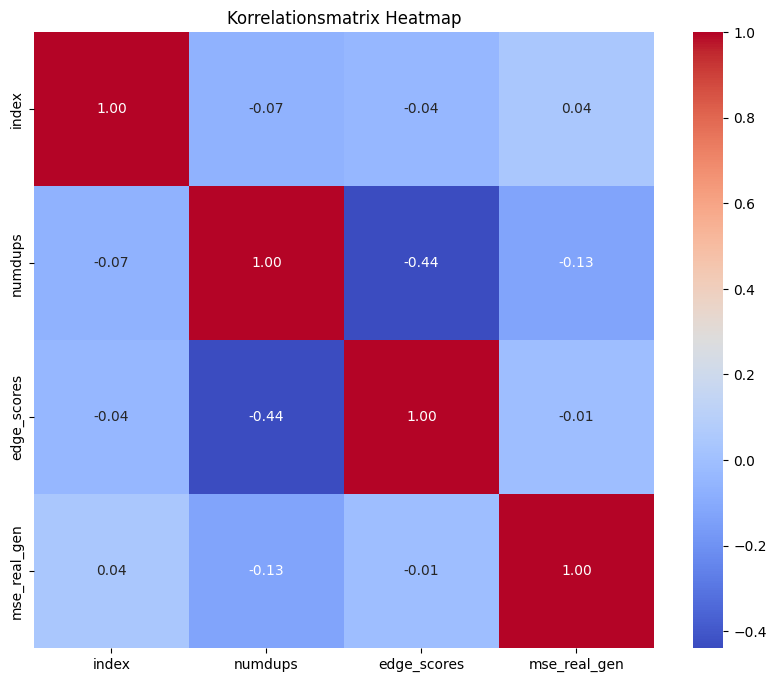

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Nur numerische Spalten auswählen
numeric_df = df.select_dtypes(include=['number'])
numeric_df.drop(columns=["scores"], inplace=True)

# Korrelation berechnen
corr = numeric_df.corr()

# Heatmap plotten
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelationsmatrix Heatmap')
plt.show()

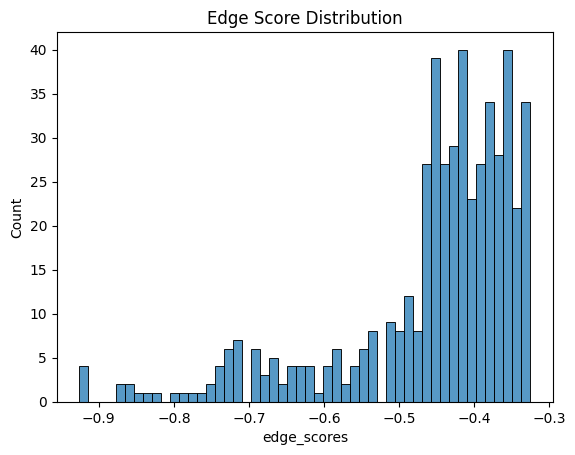

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Edge_scores Histogram
sns.histplot(df['edge_scores'], bins=50)
plt.title("Edge Score Distribution")
plt.show()




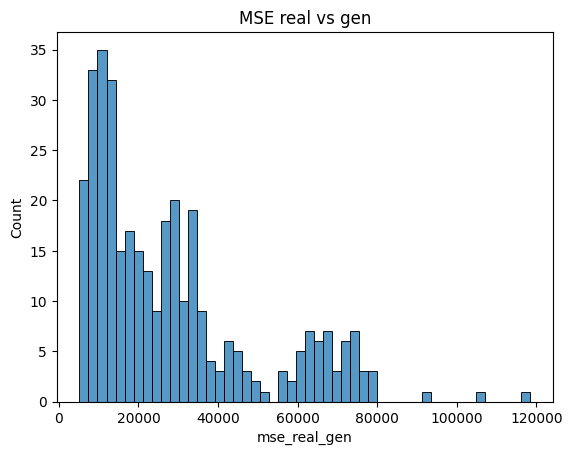

In [4]:
# MSE Histogram
sns.histplot(df['mse_real_gen'], bins=50)
plt.title("MSE real vs gen")
plt.show()



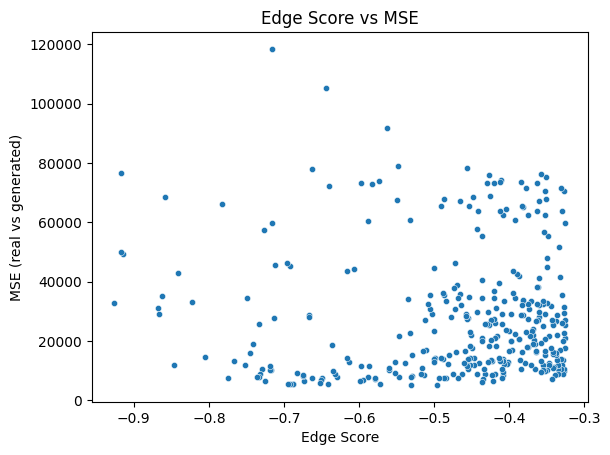

In [5]:
# Scatter Edge_score vs MSE
sns.scatterplot(
    x='edge_scores', 
    y='mse_real_gen', 
    data=df,  # Use the first AMOUNT rows for clarity
    alpha=1,  # transparency: 0 = fully transparent, 1 = opaque
    marker='o',       # x marks
    s=20              # marker size (optional)
)
plt.title("Edge Score vs MSE")
plt.xlabel("Edge Score")
plt.ylabel("MSE (real vs generated)")
plt.show()

In [6]:
# Pearson correlation (linear)
pearson_corr = df['mse_real_gen'].corr(df['edge_scores'], method='pearson')

# Spearman correlation (monotonisch, robust gegen Ausreißer)
spearman_corr = df['mse_real_gen'].corr(df['edge_scores'], method='spearman')

# Kendall Tau correlation (monotonisch, robust, basiert auf Rangpaaren)
kendall_corr = df['mse_real_gen'].corr(df['edge_scores'], method='kendall')

print(f"Pearson correlation: {pearson_corr:.3f}")
print(f"Spearman correlation: {spearman_corr:.3f}")
print(f"Kendall Tau correlation: {kendall_corr:.3f}")


Pearson correlation: -0.011
Spearman correlation: 0.117
Kendall Tau correlation: 0.077


In [7]:
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(df[['edge_scores']], df['mse_real_gen'])
print(f"Mutual information: {mi[0]:.3f}")


ValueError: Input y contains NaN.

In [8]:
import numpy as np

x = df['edge_scores'].values
y = df['mse_real_gen'].values

# Erstelle Bins
bins = np.linspace(np.min(x), np.max(x), 10)
bin_indices = np.digitize(x, bins) - 1  # Bin-Index für jeden Punkt

# Gewicht = Anzahl der Punkte in diesem Bin (oder Dichte)
weights = np.array([np.sum(bin_indices == i) for i in bin_indices])

# Gewichtete Mittelwerte
mean_x = np.average(x, weights=weights)
mean_y = np.average(y, weights=weights)

# Gewichtete Kovarianz und Standardabweichungen
cov_xy = np.average((x - mean_x)*(y - mean_y), weights=weights)
std_x = np.sqrt(np.average((x - mean_x)**2, weights=weights))
std_y = np.sqrt(np.average((y - mean_y)**2, weights=weights))

weighted_pearson = cov_xy / (std_x * std_y)
print(f"Gewichtete Pearson-Korrelation: {weighted_pearson:.3f}")


Gewichtete Pearson-Korrelation: nan


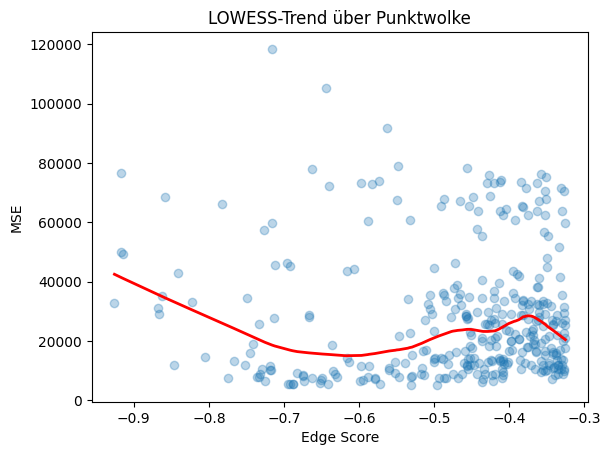

In [9]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

x = df['edge_scores']
y = df['mse_real_gen']

lowess = sm.nonparametric.lowess(y, x, frac=0.3)  # frac steuert den Glättungsbereich

plt.scatter(x, y, alpha=0.3)
plt.plot(lowess[:,0], lowess[:,1], color='red', linewidth=2)
plt.xlabel('Edge Score')
plt.ylabel('MSE')
plt.title('LOWESS-Trend über Punktwolke')
plt.show()

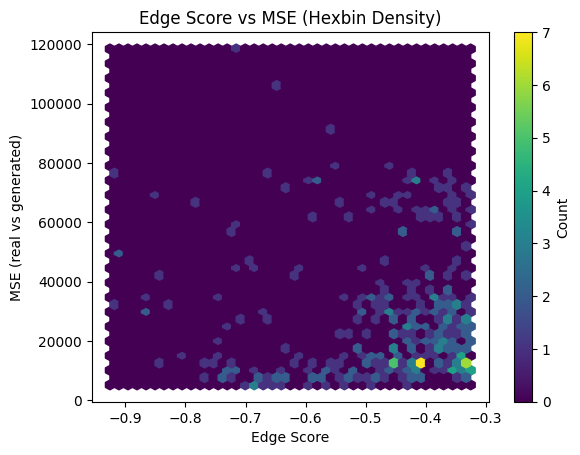

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1) Hexbin Plot (zeigt Punktdichte farbcodiert)
plt.hexbin(df['edge_scores'], df['mse_real_gen'], gridsize=40, cmap='viridis')
plt.colorbar(label='Count')
plt.xlabel("Edge Score")
plt.ylabel("MSE (real vs generated)")
plt.title("Edge Score vs MSE (Hexbin Density)")
plt.show()





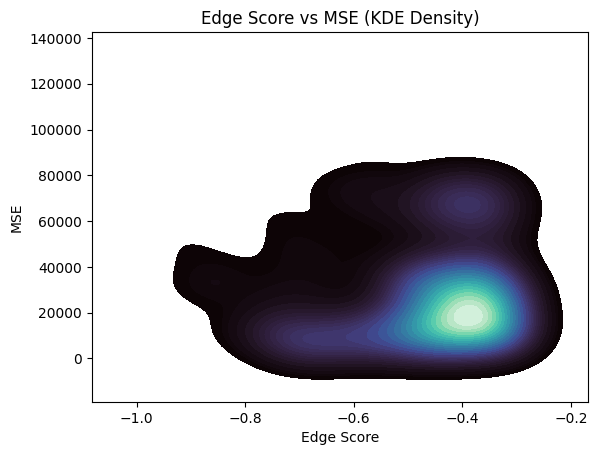

In [11]:
# 2) KDE Plot (Dichtekonturen)
sns.kdeplot(
    x='edge_scores', 
    y='mse_real_gen', 
    data=df, 
    fill=True, 
    cmap="mako", 
    levels=30, 
    thresh=0.05
)
plt.title("Edge Score vs MSE (KDE Density)")
plt.xlabel("Edge Score")
plt.ylabel("MSE")
plt.show()



/tmp/ipykernel_1838087/3636058152.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_stats = df.groupby('edge_bin')['mse_real_gen'].median().reset_index()


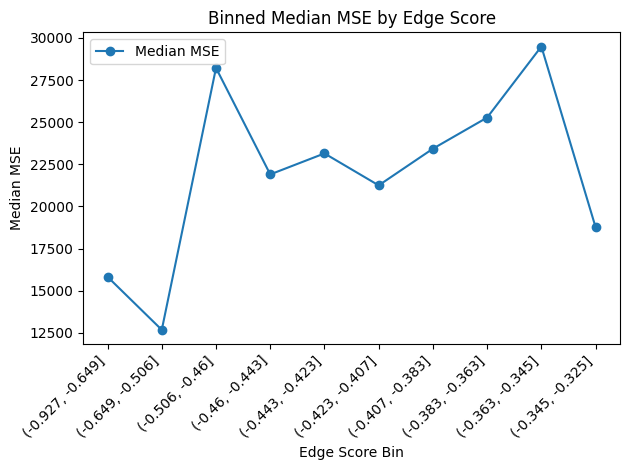

In [12]:
# 3) Binned Median (zeigt Medianwerte in Edge-Score-Intervallen)
df['edge_bin'] = pd.qcut(df['edge_scores'], q=10)  # 10 Quantil-Bins
bin_stats = df.groupby('edge_bin')['mse_real_gen'].median().reset_index()

plt.plot(bin_stats.index, bin_stats['mse_real_gen'], label='Median MSE', marker='o')
plt.xticks(bin_stats.index, bin_stats['edge_bin'].astype(str), rotation=45, ha='right')
plt.xlabel("Edge Score Bin")
plt.ylabel("Median MSE")
plt.title("Binned Median MSE by Edge Score")
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
import numpy as np
from scipy import stats

target_score = -0.4
tol = 0.05
subset = df[(df['edge_scores'] >= target_score - tol) & 
            (df['edge_scores'] <= target_score + tol)]

print(f"Anzahl der Datenpunkte im Bereich: {len(subset)}")

if len(subset) > 1:
    mse_vals = subset['mse_real_gen']
    mean = np.mean(mse_vals)
    sem = stats.sem(mse_vals)  # Standardfehler
    ci_low, ci_high = stats.t.interval(0.95, len(mse_vals)-1, loc=mean, scale=sem)
    
    print(f"Mittlerer MSE bei Edge Score ≈ {target_score}: {mean:.2f}")
    print(f"95%-Konfidenzintervall für Mittelwert: [{ci_low:.2f}, {ci_high:.2f}]")
else:
    print("Zu wenige Datenpunkte für Konfidenzintervall.")



Anzahl der Datenpunkte im Bereich: 259
Mittlerer MSE bei Edge Score ≈ -0.4: 30915.52
95%-Konfidenzintervall für Mittelwert: [nan, nan]


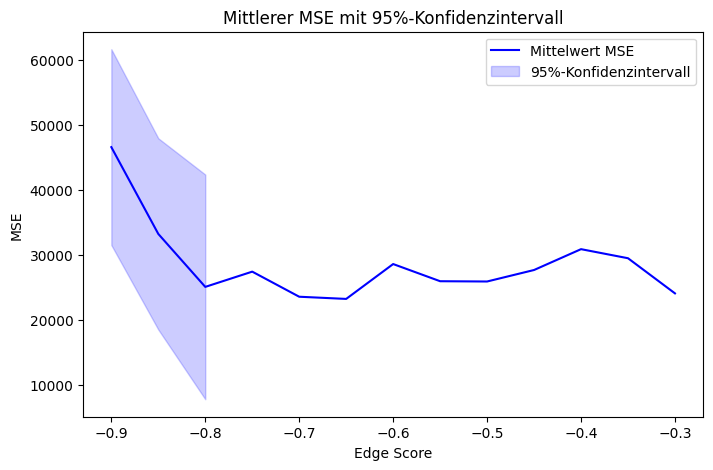

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

edge_range = np.arange(-0.9, -0.09, 0.05)  # Intervall in Schritten von 0.05
means = []
ci_lows = []
ci_highs = []

for target_score in edge_range:
    subset = df[(df['edge_scores'] >= target_score - 0.05) & 
                (df['edge_scores'] <= target_score + 0.05)]
    if len(subset) > 1:
        mse_vals = subset['mse_real_gen']
        mean = np.mean(mse_vals)
        sem = stats.sem(mse_vals)
        ci_low, ci_high = stats.t.interval(0.95, len(mse_vals)-1, loc=mean, scale=sem)
        means.append(mean)
        ci_lows.append(ci_low)
        ci_highs.append(ci_high)
    else:
        means.append(np.nan)
        ci_lows.append(np.nan)
        ci_highs.append(np.nan)

plt.figure(figsize=(8,5))
plt.plot(edge_range, means, label='Mittelwert MSE', color='blue')
plt.fill_between(edge_range, ci_lows, ci_highs, color='blue', alpha=0.2, label='95%-Konfidenzintervall')
plt.xlabel('Edge Score')
plt.ylabel('MSE')
plt.title('Mittlerer MSE mit 95%-Konfidenzintervall')
plt.legend()
plt.show()


In [15]:
import numpy as np

target_score = -0.4
tol = 0.05
subset = df[(df['edge_scores'] >= target_score - tol) & 
            (df['edge_scores'] <= target_score + tol)]

print(f"Anzahl der Datenpunkte im Bereich: {len(subset)}")

if len(subset) > 1:
    mse_vals = subset['mse_real_gen'].values
    median = np.median(mse_vals)
    
    # Bootstrapping für 95%-Konfidenzintervall
    n_boot = 1000
    medians_boot = np.array([np.median(np.random.choice(mse_vals, size=len(mse_vals), replace=True)) 
                             for _ in range(n_boot)])
    ci_low, ci_high = np.percentile(medians_boot, [2.5, 97.5])
    
    print(f"Median MSE bei Edge Score ≈ {target_score}: {median:.2f}")
    print(f"95%-Konfidenzintervall für Median: [{ci_low:.2f}, {ci_high:.2f}]")
else:
    print("Zu wenige Datenpunkte für Konfidenzintervall.")




Anzahl der Datenpunkte im Bereich: 259
Median MSE bei Edge Score ≈ -0.4: nan
95%-Konfidenzintervall für Median: [nan, nan]


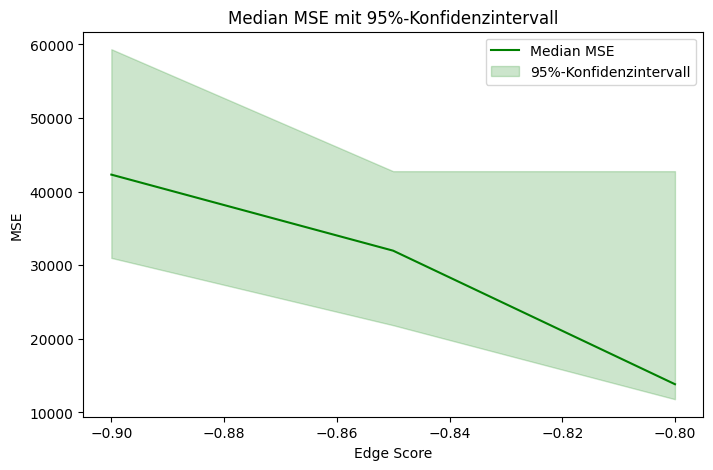

In [16]:
import numpy as np
import matplotlib.pyplot as plt

edge_range = np.arange(-0.9, -0.09, 0.05)
medians = []
ci_lows = []
ci_highs = []

n_boot = 1000  # Anzahl der Bootstrap-Stichproben

for target_score in edge_range:
    subset = df[(df['edge_scores'] >= target_score - 0.05) & 
                (df['edge_scores'] <= target_score + 0.05)]
    if len(subset) > 1:
        mse_vals = subset['mse_real_gen'].values
        median = np.median(mse_vals)
        medians.append(median)
        
        # Bootstrap für 95%-Konfidenzintervall
        medians_boot = np.array([np.median(np.random.choice(mse_vals, size=len(mse_vals), replace=True)) 
                                 for _ in range(n_boot)])
        ci_low, ci_high = np.percentile(medians_boot, [2.5, 97.5])
        ci_lows.append(ci_low)
        ci_highs.append(ci_high)
    else:
        medians.append(np.nan)
        ci_lows.append(np.nan)
        ci_highs.append(np.nan)

plt.figure(figsize=(8,5))
plt.plot(edge_range, medians, label='Median MSE', color='green')
plt.fill_between(edge_range, ci_lows, ci_highs, color='green', alpha=0.2, label='95%-Konfidenzintervall')
plt.xlabel('Edge Score')
plt.ylabel('MSE')
plt.title('Median MSE mit 95%-Konfidenzintervall')
plt.legend()
plt.show()
